# Author - Sridev T T
# GRIP @ The Sparks Foundation
# Data Science and Business Analytics Intern
# Batch - April 2024
# Task - Exploratory Data Analysis(Sports)

**Objective**:  

    1.  Exploratory Data Analysis on dataset 'Indian Premier League.
    2.  As a sports analysts, find out the most successful teams, players and
        factors contributing win or loss of a team.  
    3.  Suggest teams or players a company should endorse for its products.        









[link to dataset](https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view)

In [85]:
# Impotant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
df = pd.read_csv("/content/drive/MyDrive/grip/deliveries.csv")
df1 = pd.read_csv("/content/drive/MyDrive/grip/matches.csv")

In [87]:
# first five rows of the 'df' dataframe
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [88]:
# first five rows of the 'df1' dataframe
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [89]:
df2 = pd.merge(df1, df, left_on='id', right_on='match_id') # merge matches & deliveries datasets
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Data cleaning

In [90]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [91]:
df.shape

(179078, 21)

In [92]:
df.dropna(inplace=True)

In [93]:
# Check for missing values in the merged dataset
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [94]:
df1.shape

(756, 18)

In [95]:
# For example, drop rows with missing values
df1.dropna(inplace=True)

In [96]:
df1["city"].value_counts()

city
Mumbai           16
Kolkata          16
Hyderabad        15
Jaipur           14
Delhi            14
Bengaluru        13
Mohali           10
Chennai           9
Pune              6
Indore            4
Visakhapatnam     1
Name: count, dtype: int64

In [119]:
# Check for duplicate rows
duplicate_rows = df1.duplicated()

# Remove duplicate rows
df1 = df1.drop_duplicates()

In [120]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Remove duplicate rows
df = df.drop_duplicates()


In [121]:
# Grouping the data by city and counting matches won in each city
city_matches_won = df2.groupby('city')['winner'].count().sort_values(ascending=False)

# Getting the city with the most matches won
most_matches_won_city = city_matches_won.idxmax()

print("City with the most matches won:", most_matches_won_city)


City with the most matches won: Mumbai


In [122]:
# Grouping the data by winning team and counting matches won by each team
team_matches_won = df2['winner'].value_counts()

# Getting the team with the most matches won
most_matches_won_team = team_matches_won.idxmax()

print("Team with the most matches won:", most_matches_won_team)


Team with the most matches won: Mumbai Indians


In [123]:
# Grouping the data by player of the match and counting the number of times each player received the award
player_of_match_counts = df2['player_of_match'].value_counts()

# Getting the player with the most "Man of the Match" awards
most_man_of_match_player = player_of_match_counts.idxmax()

print("Player with the most 'Man of the Match' awards:", most_man_of_match_player)


Player with the most 'Man of the Match' awards: CH Gayle


In [124]:
# Counting the occurrences of each umpire in the 'umpire1' column
umpire1_counts = df2['umpire1'].value_counts()

# Getting the most frequent Umpire 1
most_frequent_umpire1 = umpire1_counts.idxmax()

print("Most frequent Umpire 1:", most_frequent_umpire1)


Most frequent Umpire 1: HDPK Dharmasena


In [125]:
# Grouping the data by season
season_wise_data = df2.groupby('season')

# Counting the number of matches played per season
matches_per_season = season_wise_data.size()
# Counting the number of matches played per season
matches_per_season = season_wise_data.size()
# Unique teams participating in each season
teams_per_season = season_wise_data['team1'].nunique()
# Winner of each season
season_winners = season_wise_data.tail(1)['winner'].values


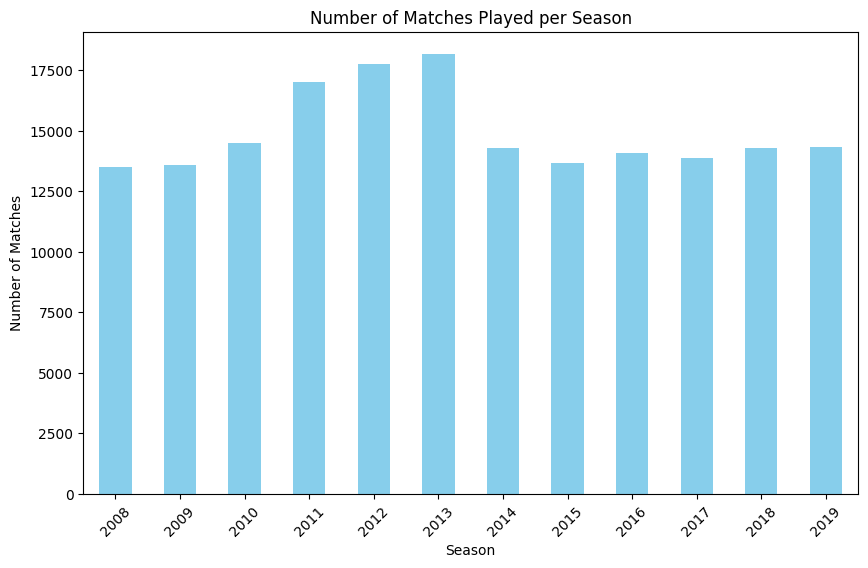

In [126]:
# Plotting number of matches per season
plt.figure(figsize=(10, 6))
matches_per_season.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

**We can see the most of the matches had been played in the year 2011, 2012 and 2013**

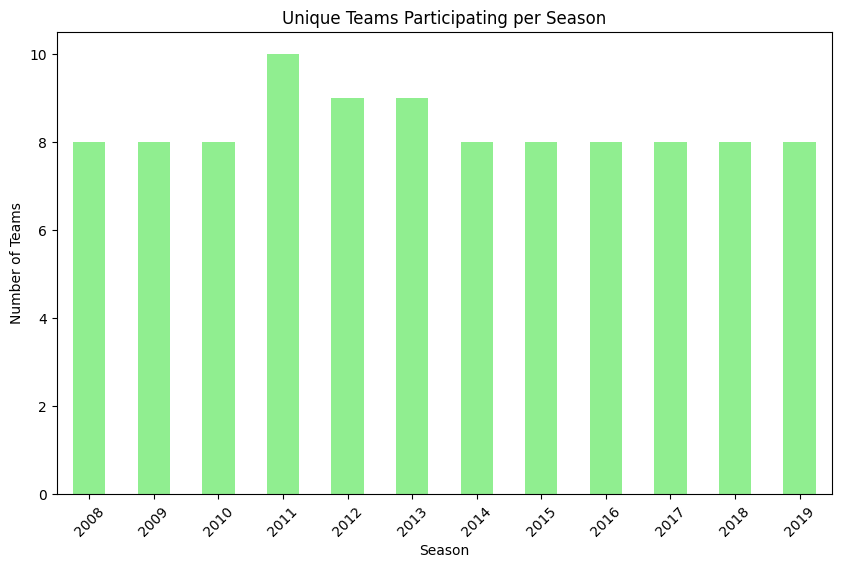

In [127]:
# Plotting teams participating in each season
plt.figure(figsize=(10, 6))
teams_per_season.plot(kind='bar', color='lightgreen')
plt.title('Unique Teams Participating per Season')
plt.xlabel('Season')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.show()

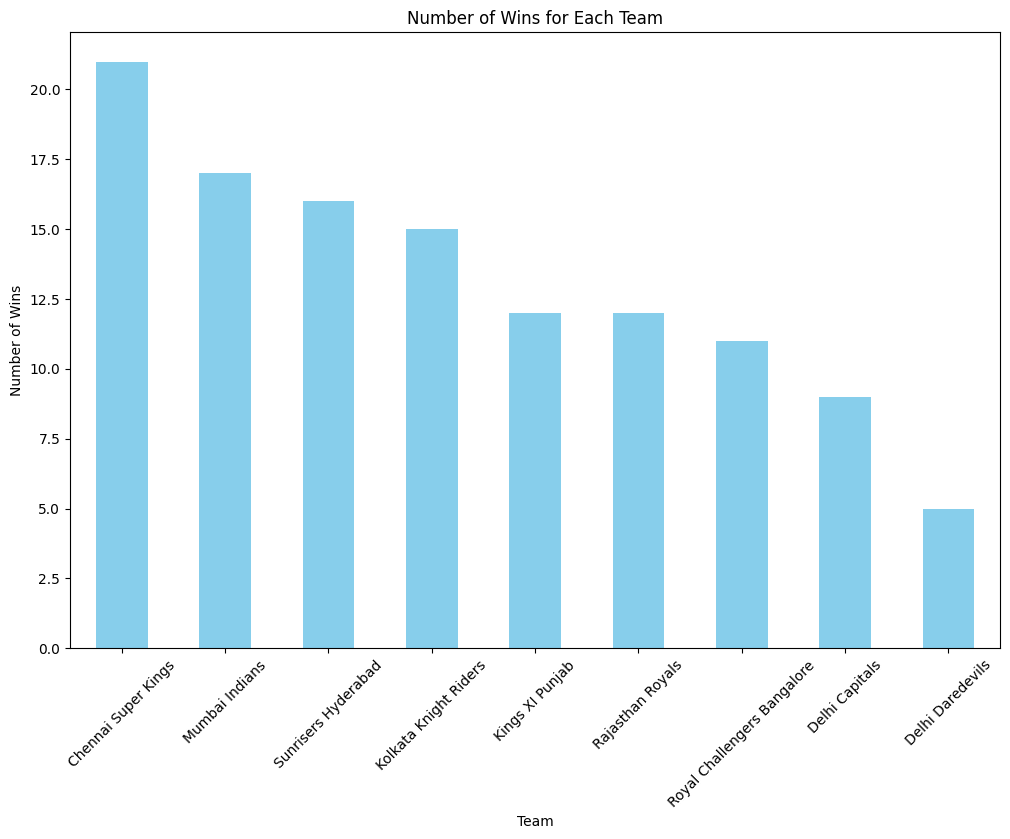

In [128]:
# Counting the number of wins for each team
team_wins = df1['winner'].value_counts()

# Plotting the number of wins for each team
plt.figure(figsize=(12, 8))
team_wins.plot(kind='bar', color='skyblue')
plt.title('Number of Wins for Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


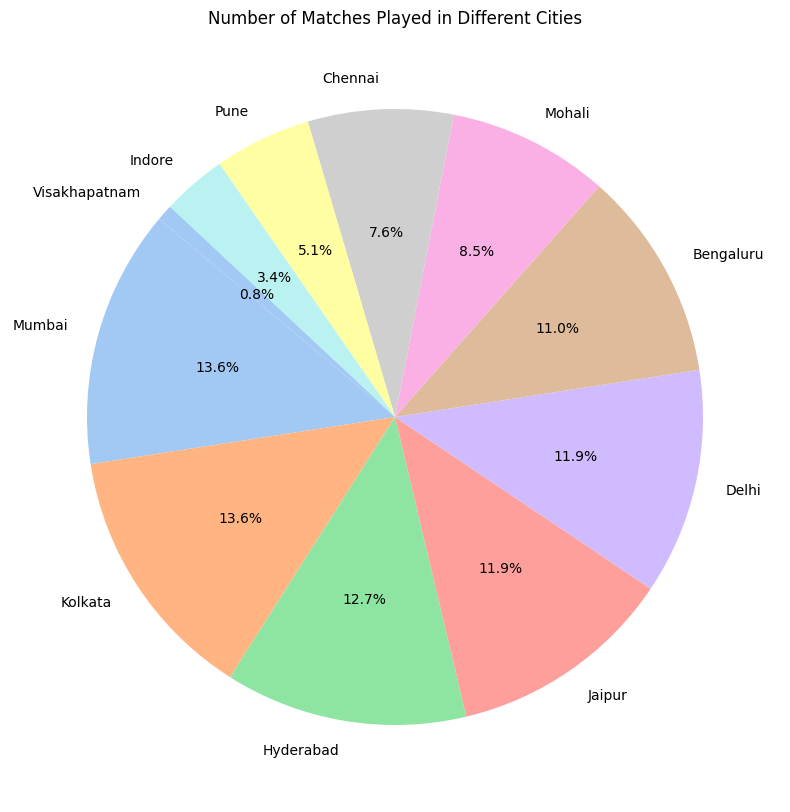

In [129]:
matches_per_city = df1['city'].value_counts()

# Plotting the number of matches played in each city as a pie chart
plt.figure(figsize=(10, 10))
matches_per_city.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Number of Matches Played in Different Cities')
plt.ylabel('')
plt.show()


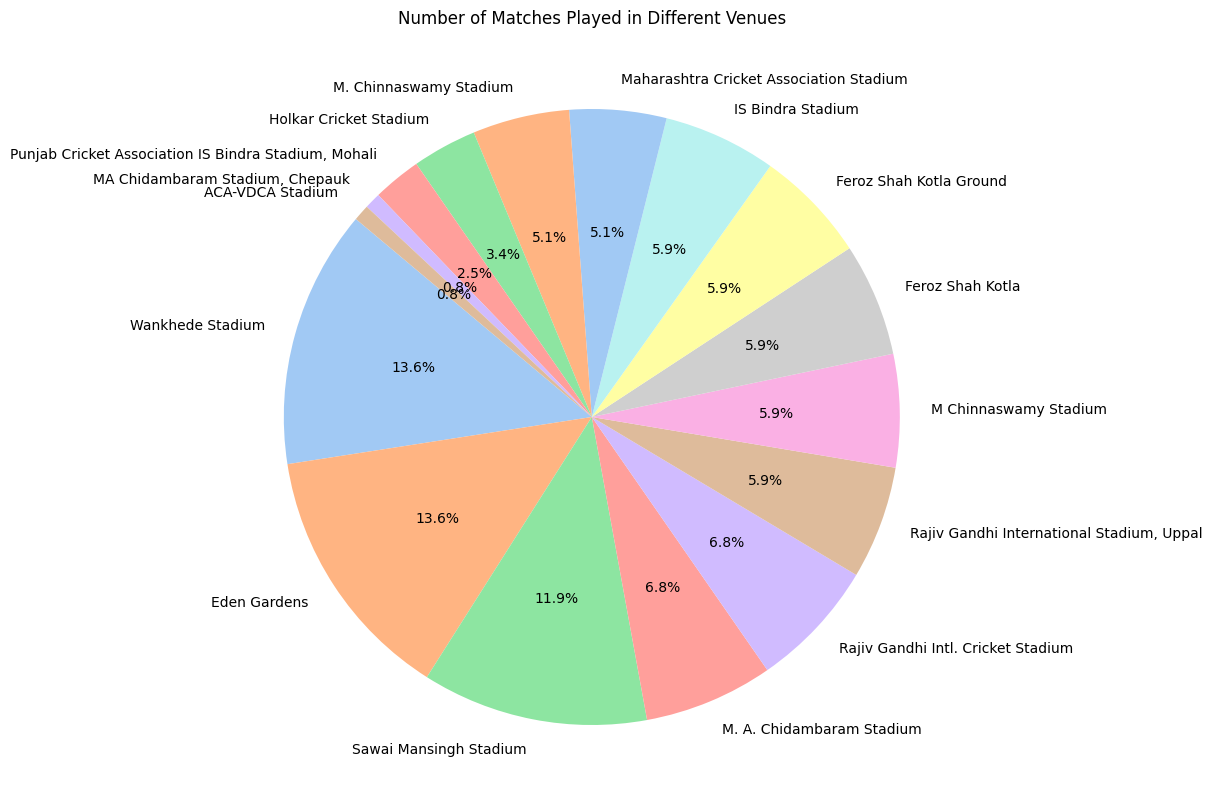

In [130]:
# Counting the number of matches played in each venue
matches_per_venue = df1['venue'].value_counts()

# Plotting the number of matches played in each venue as a pie chart
plt.figure(figsize=(10, 10))
matches_per_venue.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Number of Matches Played in Different Venues')
plt.ylabel('')
plt.show()


<Figure size 1200x800 with 0 Axes>

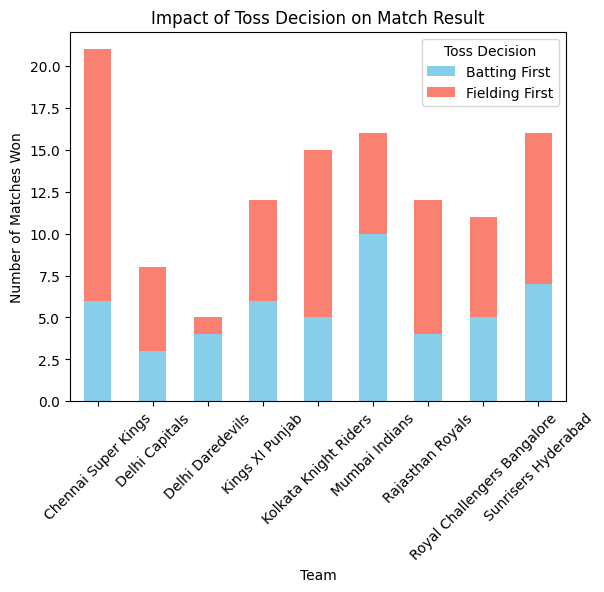

In [131]:
# Calculate the number of matches won by teams batting first
matches_won_batting_first = df1[df1['win_by_runs'] > 0]['winner'].value_counts()

# Calculate the number of matches won by teams fielding first
matches_won_fielding_first = df1[df1['win_by_wickets'] > 0]['winner'].value_counts()

# Create a DataFrame to store the results
toss_decision_df = pd.DataFrame({
    'Batting First': matches_won_batting_first,
    'Fielding First': matches_won_fielding_first
}).fillna(0)

# Plot the comparison using a bar plot
plt.figure(figsize=(12, 8))
toss_decision_df.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Impact of Toss Decision on Match Result')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.show()


In [132]:
# Group the data by batsman and calculate total runs scored by each batsman
batsman_runs = df2.groupby('batsman')['batsman_runs'].sum()

# Group the data by batsman and calculate total matches played by each batsman
batsman_matches_played = df2.groupby('batsman')['match_id'].nunique()

# Calculate average runs scored per match for each batsman
average_runs_per_match = batsman_runs / batsman_matches_played

# Sort batsmen based on average runs scored per match
most_consistent_batsmen = average_runs_per_match.sort_values(ascending=False).head(10)

print("Top 10 most consistent batsmen of IPL:")
print(most_consistent_batsmen)


Top 10 most consistent batsmen of IPL:
batsman
J Bairstow     46.800000
DA Warner      37.626984
LMP Simmons    37.206897
CH Gayle       36.774194
SE Marsh       36.072464
HM Amla        36.062500
KL Rahul       34.706897
ML Hayden      34.593750
MEK Hussey     34.086207
R Parag        33.800000
dtype: float64


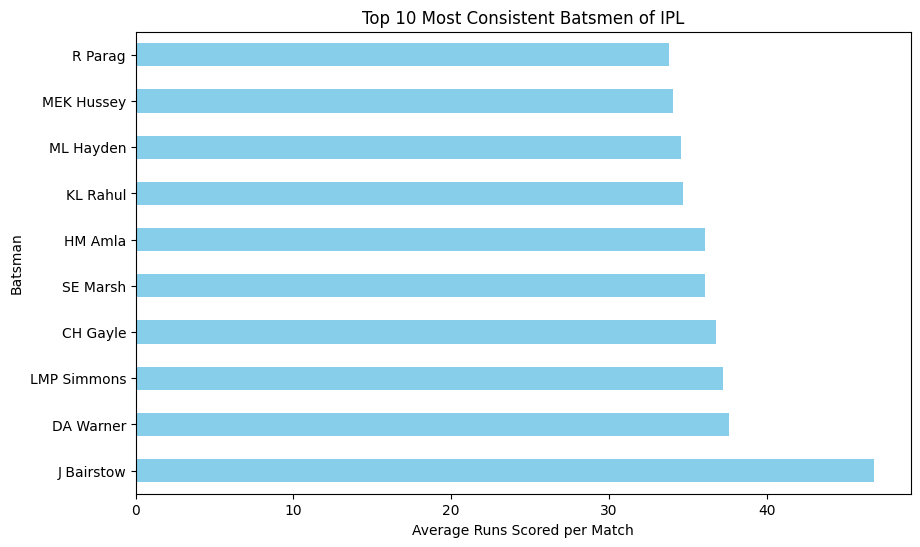

In [133]:
# Plotting the top 10 most consistent batsmen
plt.figure(figsize=(10, 6))
most_consistent_batsmen.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Consistent Batsmen of IPL')
plt.xlabel('Average Runs Scored per Match')
plt.ylabel('Batsman')
plt.show()


In [134]:
# Group the data by bowler and calculate the total number of wickets taken by each bowler
wickets_taken = df2[df2['dismissal_kind'] != 'run out']['bowler'].value_counts()

# Get the top 10 wicket-takers
top_wicket_takers = wickets_taken.head(10)

print("Top 10 Wicket Takers of IPL:")
print(top_wicket_takers)


Top 10 Wicket Takers of IPL:
bowler
Harbhajan Singh    3440
A Mishra           3163
PP Chawla          3150
R Ashwin           3003
SL Malinga         2956
B Kumar            2699
DJ Bravo           2690
P Kumar            2625
UT Yadav           2588
SP Narine          2585
Name: count, dtype: int64


<ipython-input-135-f4990bf69615>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bowler', y='Wickets', data=top_wicket_takers_df, palette='Set2')


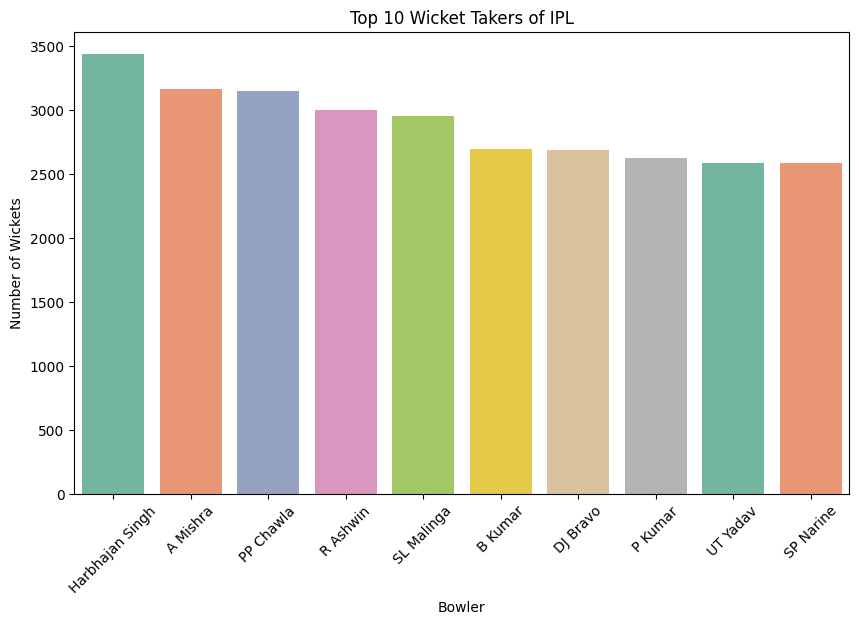

In [135]:
# Create a DataFrame for the top 10 wicket-takers
top_wicket_takers_df = pd.DataFrame({
    'Bowler': top_wicket_takers.index,
    'Wickets': top_wicket_takers.values
})

# Plot the top 10 wicket-takers using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Bowler', y='Wickets', data=top_wicket_takers_df, palette='Set2')
plt.title('Top 10 Wicket Takers of IPL')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.show()


Top 5 Teams with Highest Win Percentages:
                    Team  Win Percentage
0    Chennai Super Kings       17.796610
1         Mumbai Indians       14.406780
2    Sunrisers Hyderabad       13.559322
3  Kolkata Knight Riders       12.711864
4        Kings XI Punjab       10.169492


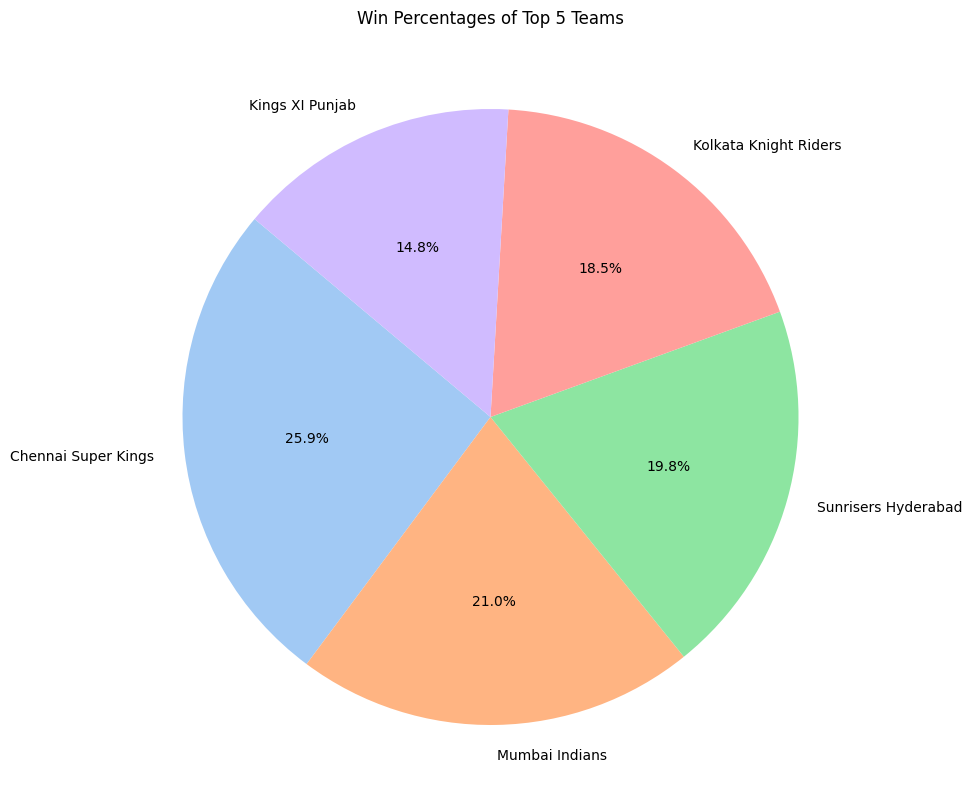

In [136]:
# Calculate the win percentage for each team
team_win_percentage = (df1['winner'].value_counts() / df1['winner'].value_counts().sum()) * 100

# Create a DataFrame for the team win percentages
team_win_percentage_df = pd.DataFrame({
    'Team': team_win_percentage.index,
    'Win Percentage': team_win_percentage.values
})

# Sort the DataFrame by win percentage
team_win_percentage_df = team_win_percentage_df.sort_values(by='Win Percentage', ascending=False)

# Print the top 5 teams with the highest win percentages
print("Top 5 Teams with Highest Win Percentages:")
print(team_win_percentage_df.head())

# Create a pie chart to visualize the win percentages of the top 5 teams
plt.figure(figsize=(10, 10))
plt.pie(team_win_percentage_df['Win Percentage'].head(), labels=team_win_percentage_df['Team'].head(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Win Percentages of Top 5 Teams')
plt.ylabel('')
plt.show()



Number of matches won by batting first: 50
Number of matches won by bowling first (chasing): 66
There were more matches won by chasing the total than defending.


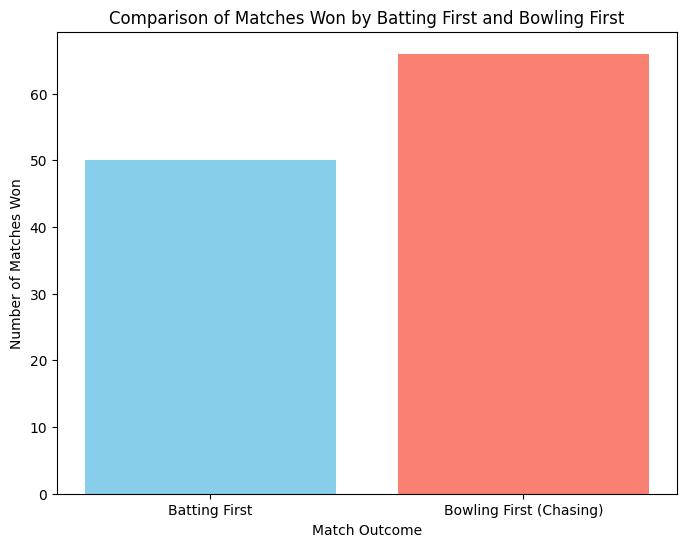

In [137]:
# Counting the number of matches won by batting first
matches_won_batting_first = df1[df1['win_by_runs'] > 0]['winner'].count()

# Counting the number of matches won by bowling first (chasing)
matches_won_bowling_first = df1[df1['win_by_wickets'] > 0]['winner'].count()

print("Number of matches won by batting first:", matches_won_batting_first)
print("Number of matches won by bowling first (chasing):", matches_won_bowling_first)

# Check if more matches were won by chasing the total than defending
if matches_won_bowling_first > matches_won_batting_first:
    print("There were more matches won by chasing the total than defending.")
else:
    print("There were more matches won by defending than chasing the total.")
# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Batting First', 'Bowling First (Chasing)'], [matches_won_batting_first, matches_won_bowling_first], color=['skyblue', 'salmon'])
plt.title('Comparison of Matches Won by Batting First and Bowling First')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches Won')
plt.show()

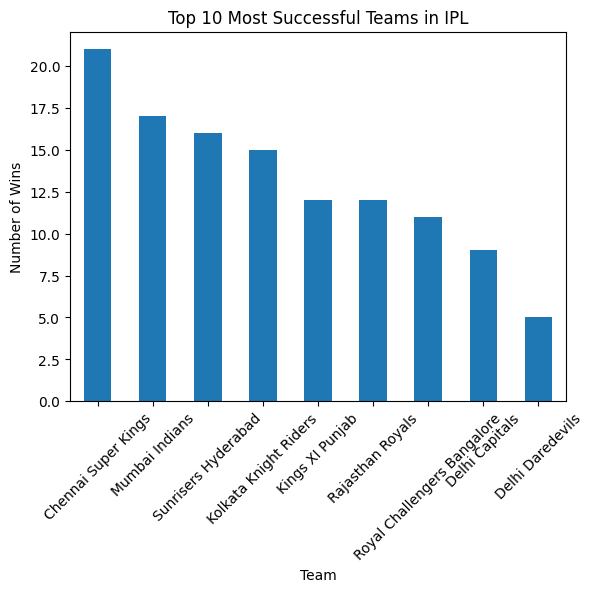

In [138]:
# Create a bar plot of the top 10 most successful teams in the IPL based on the number of wins
df1['winner'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Successful Teams in IPL')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


In [139]:
# Count the number of matches won by teams choosing to field first after winning the toss
matches_won_fielding_first = df1[df1['toss_winner'] == df1['winner']][df1['toss_decision'] == 'field']['winner'].count()

# Count the number of matches won by teams choosing to bat first after winning the toss
matches_won_batting_first = df1[df1['toss_winner'] == df1['winner']][df1['toss_decision'] == 'bat']['winner'].count()

# Calculate the total number of matches where the toss winner also won the match
total_matches_won_by_toss_winner = df1[df1['toss_winner'] == df1['winner']]['winner'].count()

# Calculate the probability of winning when choosing to field first
probability_fielding_first = matches_won_fielding_first / total_matches_won_by_toss_winner

# Calculate the probability of winning when choosing to bat first
probability_batting_first = matches_won_batting_first / total_matches_won_by_toss_winner

<ipython-input-139-5ea4012eca1d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matches_won_fielding_first = df1[df1['toss_winner'] == df1['winner']][df1['toss_decision'] == 'field']['winner'].count()
<ipython-input-139-5ea4012eca1d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matches_won_batting_first = df1[df1['toss_winner'] == df1['winner']][df1['toss_decision'] == 'bat']['winner'].count()


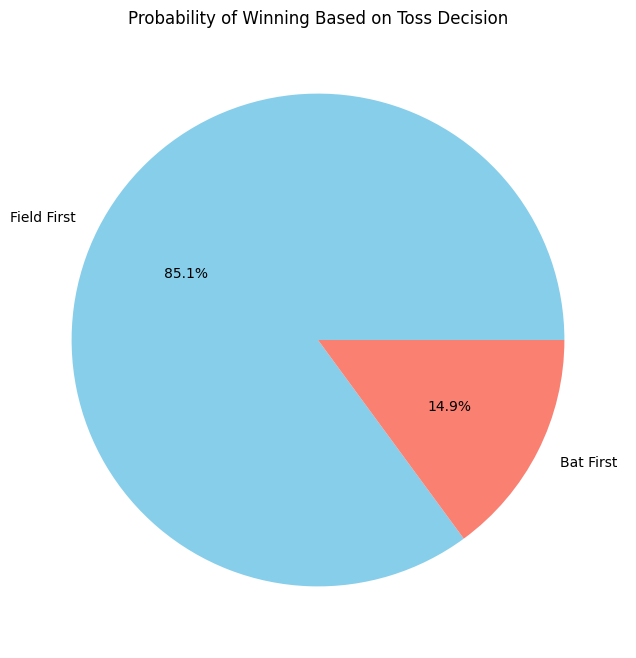

In [140]:
probabilities = [probability_fielding_first, probability_batting_first]
labels = ['Field First', 'Bat First']

# Plotting the probabilities as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(probabilities, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Probability of Winning Based on Toss Decision')
plt.show()


# Conclusion

**As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**
1. Mumbai Indians is the most successful team in IPL and has won the most number of toss.  
2. There were more matches won by chasing than defending.   
3. The Mumbai city has hosted the most number of IPL matches.  
4. Player with the most 'Man of the Match' awards: CH Gayle.  
5. Eden Gardens and Wankhede stadium has hosted the maximum number of IPL matches.  
6. If a team wins a toss choose to field first as it has highest probablity of winning